# Importieren der Daten

In [1]:
import pandas as pd

df = pd.read_csv('classification.csv')

# Mit den Daten vertraut machen

In [3]:
df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [4]:
df.describe()

,age,interest,success
count,297.000000,297.000000,297.000000
mean,23.709718,46.986527,0.569024
std,8.864000,21.956447,0.496049
min,2.347560,-0.852800,0.000000
25%,17.002148,28.689067,0.000000
50%,23.283644,45.695926,1.000000
75%,30.661149,65.171876,1.000000
max,45.773729,97.175508,1.000000


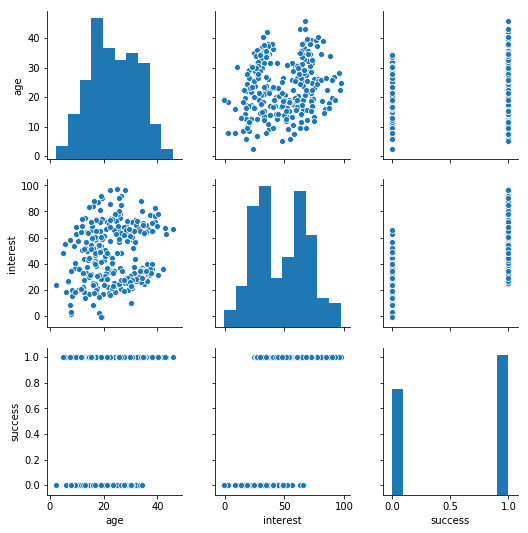

In [5]:
import seaborn as sns
%matplotlib inline

sns.pairplot(df);

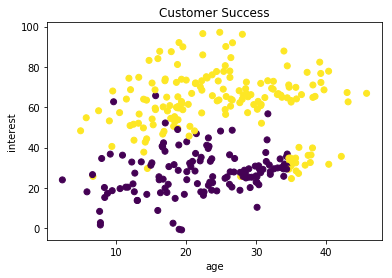

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['age'], df['interest'], c=df['success'])
plt.xlabel('age')
plt.ylabel('interest')
plt.title("Customer Success");

# Datenaufbereitung
## Aufteilung in Trainings und Testdaten

In [7]:
from sklearn.model_selection import train_test_split

X = df[["age", "interest"]].values
y = df["success"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

## Daten Skalieren

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

# Auswahl des Algorithmus
## Modell trainieren

In [25]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 71);
model.fit(X_train_transformed, y_train);
print(model.score(X_test_transformed, y_test))

0.8266666666666667


# Evaluation und Abstimmung

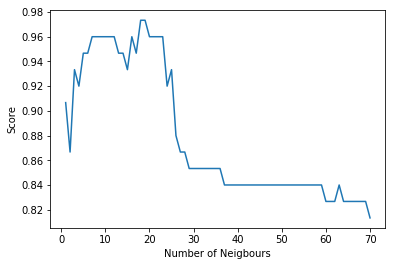

In [12]:
import numpy as np

nmax = 71
x = np.arange(1, nmax, 1)
scores = []

for i in range (1, nmax):
    smodel = KNeighborsClassifier(n_neighbors = i);
    smodel.fit(X_train_transformed, y_train);
    scores.append(smodel.score(X_test_transformed, y_test))

plt.plot(x, scores)
plt.xlabel("Number of Neigbours")
plt.ylabel("Score");

# Visualisierung 

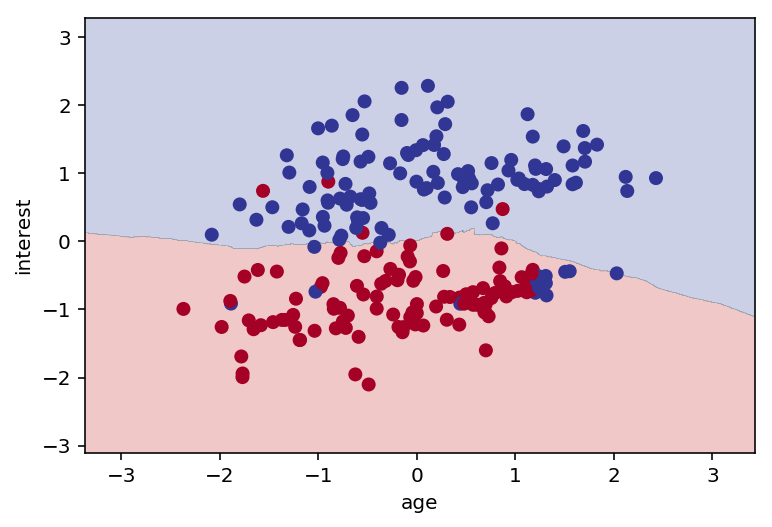

In [26]:
from helper import plot_classifier

plot_classifier(model, X_train_transformed, y_train, xlabel ="age", ylabel = "interest")

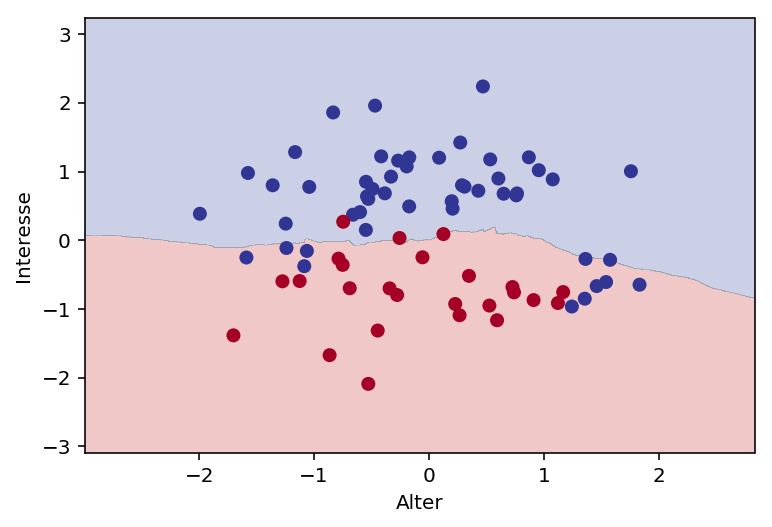

In [27]:
plot_classifier(model, X_test_transformed, y_test, xlabel = "Alter", ylabel = "Interesse")

In [24]:
# age, interest
bsp = [[10, 60]]
bspscaled = scaler.transform(bsp)
print("Alter und Interesse skaliert: " + str(bspscaled))
y = model.predict(bspscaled)
print("Success-Prediction: " + str(y))

Alter und Interesse skaliert: [[-1.52456399  0.6193264 ]]
Success-Prediction: [0.]
